In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#modeling Metrices 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [13]:
#Additional Model

# Import necessary libraries
from catboost import CatBoostRegressor
import warnings

# Optional: Ignore warnings if they are not needed
warnings.filterwarnings("ignore")


In [15]:
df = pd.read_csv('stud.csv')

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,bachelor's degree,standard,completed,69,32,72
1,female,group D,master's degree,free/reduced,completed,14,8,41
2,male,group B,bachelor's degree,free/reduced,completed,77,14,26
3,male,group B,some college,free/reduced,none,83,20,54
4,male,group A,high school,standard,none,62,63,78


In [19]:
X = df.drop(columns='math_score' , axis=1)

In [20]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,male,group A,bachelor's degree,standard,completed,32,72
1,female,group D,master's degree,free/reduced,completed,8,41
2,male,group B,bachelor's degree,free/reduced,completed,14,26
3,male,group B,some college,free/reduced,none,20,54
4,male,group A,high school,standard,none,63,78


In [21]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group A' 'group D' 'group B' 'group E' 'group C']
Categories in'parental level of education' variable: ["bachelor's degree" "master's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [24]:
y  = df['math_score']

In [25]:
y

0        69
1        14
2        77
3        83
4        62
         ..
99995    83
99996    36
99997     2
99998    71
99999    27
Name: math_score, Length: 100000, dtype: int64

In [26]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [27]:
X = preprocessor.fit_transform(X)

In [30]:
X.shape

(100000, 19)

In [31]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80000, 19), (20000, 19))

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 29.2313
- Mean Absolute Error: 25.3004
- R2 Score: 0.0001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.1609
- Mean Absolute Error: 25.2476
- R2 Score: -0.0005


Lasso
Model performance for Training set
- Root Mean Squared Error: 29.2326
- Mean Absolute Error: 25.3012
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.1532
- Mean Absolute Error: 25.2422
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 29.2305
- Mean Absolute Error: 25.2999
- R2 Score: 0.0001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.1582
- Mean Absolute Error: 25.2467
- R2 Score: -0.0004


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 26.1346
- Mean Absolute Error: 21.9170
- R2 Score: 0.2007
------

In [34]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,-0.000018
7,AdaBoost Regressor,-0.000222
2,Ridge,-0.000366
0,Linear Regression,-0.000548
6,CatBoosting Regressor,-0.011037
5,Random Forest Regressor,-0.099876
3,K-Neighbors Regressor,-0.201385
4,Decision Tree,-1.063168


In [35]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -0.05


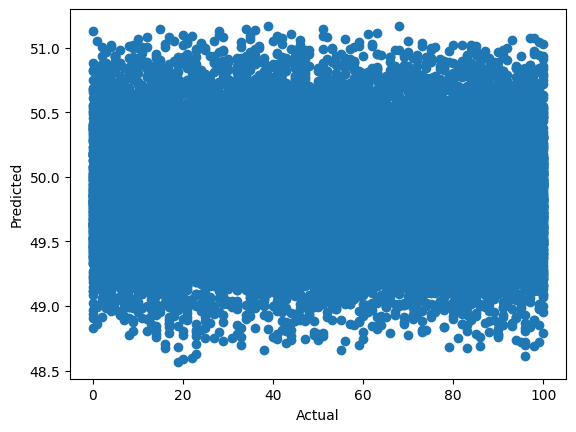

In [36]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

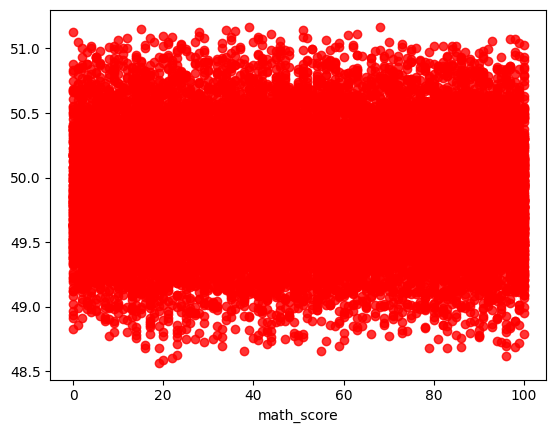

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
75721,42,49.950684,-7.950684
80184,51,50.202637,0.797363
19864,7,49.264160,-42.264160
76699,8,50.308105,-42.308105
92991,7,49.272949,-42.272949
...,...,...,...
32595,84,49.594238,34.405762
29313,85,50.304199,34.695801
37862,21,50.281738,-29.281738
53421,98,50.358398,47.641602
